# Вступительное задание ЛШ_2017
## Анализ данных о покемонах
## Выполнил Мальцев Илья

Я решил проверить зависимость счастья покемонов от коэффициента их поимки. Думаю, многим интересно, нравится ли им то, что их ловят, или же нет.

In [288]:
#Заставляем библиотеку matplotlib рисовать графики и диаграммы прямо в линии
%matplotlib inline

#Импортируем нужные библиотеки
import pandas as pd
import numpy as np

#Открываем файл pokemon.csv
pokemon = pd.read_csv('pokemon.csv')

#Создаем таблицу только из нужных нам данных: коэффициента поимки и уровня счастья
catchHappy = pokemon[['name', 'base_happiness', 'catch_rate']].copy()

#Сортируем столбик с коэффициентом поимки по возрастанию
catchHappy_sort = catchHappy.sort_values('catch_rate')

#Проверяем, создалась ли таблица и отсортировались ли у нас данные
#Транспонируем таблицу для удобства
catchHappy_sort.T

,662,374,145,144,143,486,376,377,378,379,...,508,59,505,504,503,326,260,73,264,68
name,Meloetta,Metang,Moltres,Zapdos,Articuno,Giratina,Regirock,Regice,Registeel,Latias,...,Purrloin,Poliwag,Lillipup,Watchog,Patrat,Spinda,Poochyena,Geodude,Wurmple,Bellsprout
base_happiness,100,35,35,35,35,0,35,35,35,90,...,70,70,70,70,70,70,70,70,70,70
catch_rate,3,3,3,3,3,3,3,3,3,3,...,255,255,255,255,255,255,255,255,255,255


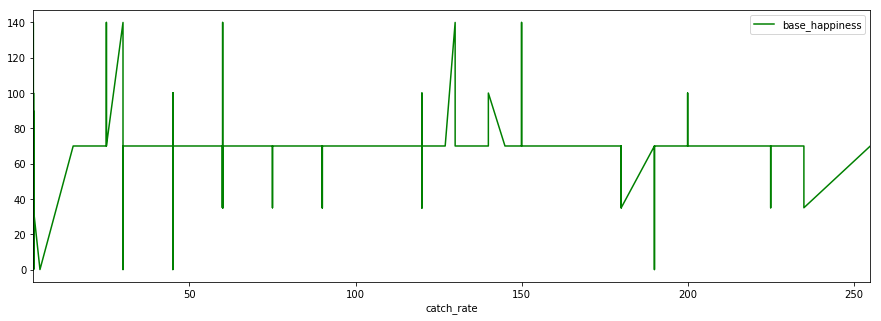

In [282]:
#Рисуем столбчатую диаграмму на основе полученных данных
catchHappy_sort.plot('catch_rate', 'base_happiness', color = 'green', figsize = (15, 5))

Как видно из графика, никакой зависимости нет.
Однако, если принять значение счастья, равное 70, как равнодушие, то почти всем покемонам абсолютно все равно на то, насколько часто вы их ловите.

А теперь я хочу найти покемона, который больше всего рад, что его ловят, и покемона, который меньше всего этому рад.

Значение catch_rate в обоих случаях должно быть как можно больше, а уровень счастья у некоторых покемонов равен нулю, поэтому я использую простое умножение (catch_rate*base_happiness).

Покемон с самым большим коэффициентом поимки, и счастьем, равным нулю, будет самым несчастным.
А покемон, у которого большие коэффициент поимки и уровень счастья, будет самым счастливым.

In [289]:
#Рассчитаем коэффициент счастья покемонов и добавим колонку с коэффициентами в нашу табличку
catchHappy_sort.insert(loc = 3, column = 'happy_coefficient', value = catchHappy_sort.base_happiness*catchHappy_sort.catch_rate)

#Выведем полученную табличку. Опять же, транспонируем её для удобства
catchHappy_sort.T

,662,374,145,144,143,486,376,377,378,379,...,508,59,505,504,503,326,260,73,264,68
name,Meloetta,Metang,Moltres,Zapdos,Articuno,Giratina,Regirock,Regice,Registeel,Latias,...,Purrloin,Poliwag,Lillipup,Watchog,Patrat,Spinda,Poochyena,Geodude,Wurmple,Bellsprout
base_happiness,100,35,35,35,35,0,35,35,35,90,...,70,70,70,70,70,70,70,70,70,70
catch_rate,3,3,3,3,3,3,3,3,3,3,...,255,255,255,255,255,255,255,255,255,255
happy_coefficient,300,105,105,105,105,0,105,105,105,270,...,17850,17850,17850,17850,17850,17850,17850,17850,17850,17850


In [290]:
#Найдем максимальное значение коэффициента счастья у покемонов
happy_coefficient = catchHappy_sort[catchHappy_sort['happy_coefficient'] == max(catchHappy_sort['happy_coefficient'])]

#И выведем полученную табличку
happy_coefficient

,name,base_happiness,catch_rate,happy_coefficient
34,Clefairy,140,150,21000
172,Cleffa,140,150,21000


Как видно по результатам, два покемона, Clefairy и Cleffa, очень рады, когда их ловят.

In [294]:
#А теперь найдем минимальное значение коэффициента счастья
unhappy_coefficient = catchHappy_sort[catchHappy_sort['happy_coefficient'] == min(catchHappy_sort['happy_coefficient'])]

#Снова выведем результаты
unhappy_coefficient

,name,base_happiness,catch_rate,happy_coefficient
486,Giratina,0,3,0
383,Rayquaza,0,3,0
385,Deoxys,0,3,0
492,Arceus,0,3,0
485,Regigigas,0,3,0
490,Darkrai,0,3,0
149,Mewtwo,0,3,0
655,Giratina,0,3,0
651,Deoxys,0,3,0
650,Deoxys,0,3,0


Как видно, существует довольно много покемонов с минимальным значением счастья. Нам нужен тот, у которого самый большой коэффициент поимки.

In [292]:
#Производим сортировку по самому большому коэффициенту поимки
unhappy_coefficient[unhappy_coefficient['catch_rate'] == max(unhappy_coefficient['catch_rate'])]

,name,base_happiness,catch_rate,happy_coefficient
426,Buneary,0,190,0


Buneary совсем не хочет быть пойманым, видимо, любит побыть в одиночестве.

К сожалению, нет никакой закономерности между коэффициентом поимки и уровнем счастья покемонов, однако можно найти самых счастливых покемонов с большим коэффициентом поимки и самых несчастных.